In [1]:
#pip install sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

In [3]:
df = pd.read_csv('bank-full.csv', sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [5]:
df['conversion'] = df['y'].apply(lambda x : 1  if x == 'yes' else 0)

In [6]:
df['conversion']   #check

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: conversion, Length: 45211, dtype: int64

In [7]:
df_age_sum  =  df.groupby('age')['conversion'].sum()

In [8]:
df['group_age'] = df['age'].apply(lambda x:  '18,30' if x < 30 else '30,40' if x< 40 else '40,50' if x <50 else '50,60' if x <60 else '60,70' if x<70
                                          else '70+') 

In [9]:
con_rate_by_job = pd.DataFrame(df.groupby('job')['conversion'].sum()/df.shape[0]*100)
con_rate_by_job

,conversion
job,
admin.,1.395678
blue-collar,1.565991
entrepreneur,0.272058
housemaid,0.241092
management,2.877618
retired,1.141315
self-employed,0.413616
services,0.816173
student,0.594988


可以觀察到可能 管理以及藍領、技術人員購買產品 (定存) 的比例較高

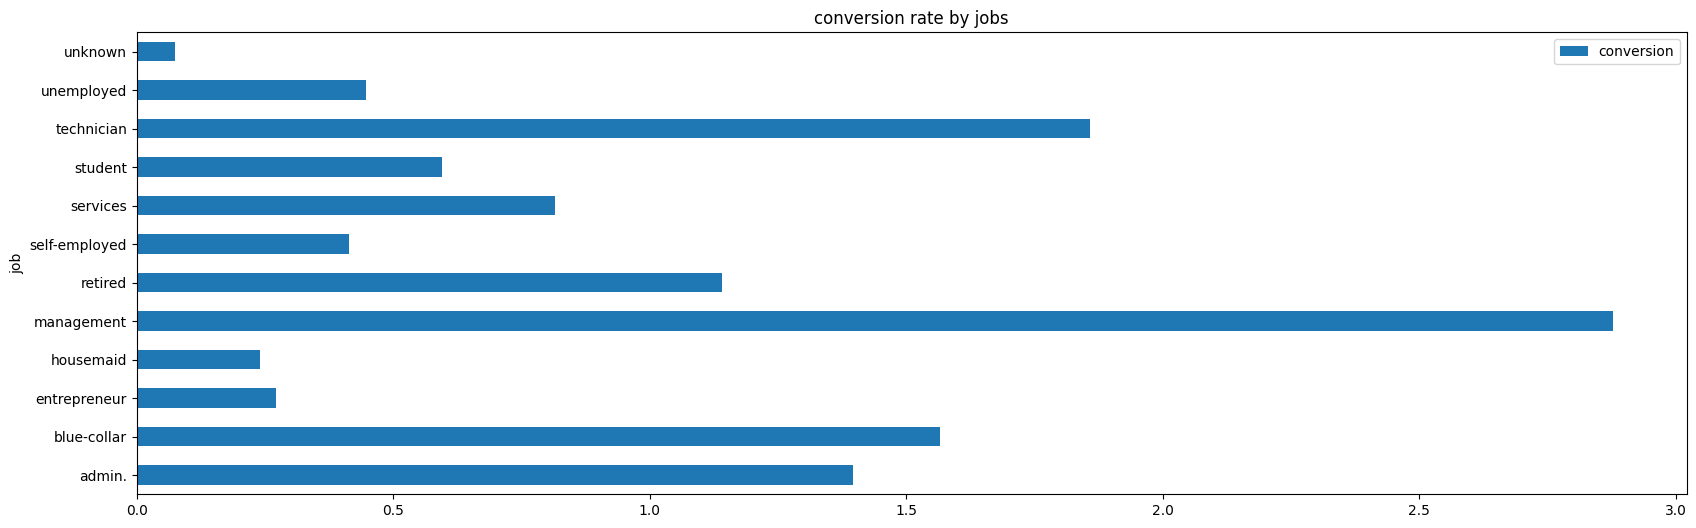

In [10]:
ax = con_rate_by_job.plot(kind = 'barh',
                         figsize = (20,6),title = 'conversion rate by jobs')
plt.show()

In [11]:
default_rate =  pd.pivot_table(
                df, values = 'y',index='default', columns = 'conversion', aggfunc = len)

In [12]:
default_rate

conversion,0,1
default,,
no,39159,5237
yes,763,52


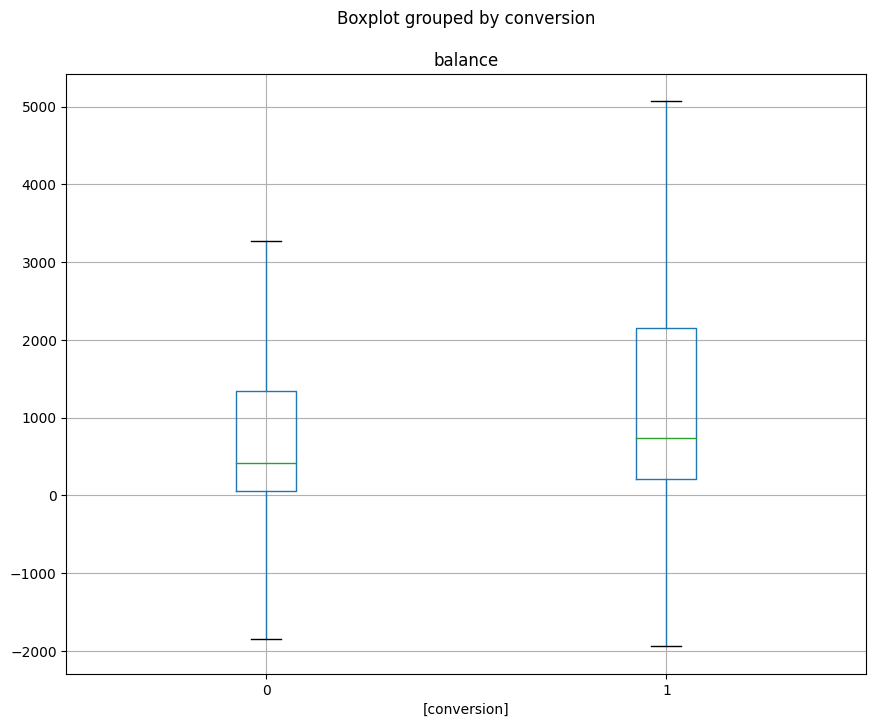

In [13]:
ax = df[['conversion','balance']].boxplot(by='conversion',
                                          showfliers = False,
                                         figsize = (10,8))

In [14]:
cam_num = df.groupby('campaign')['conversion'].sum()/df.groupby('campaign').count()['conversion']
#cam_num

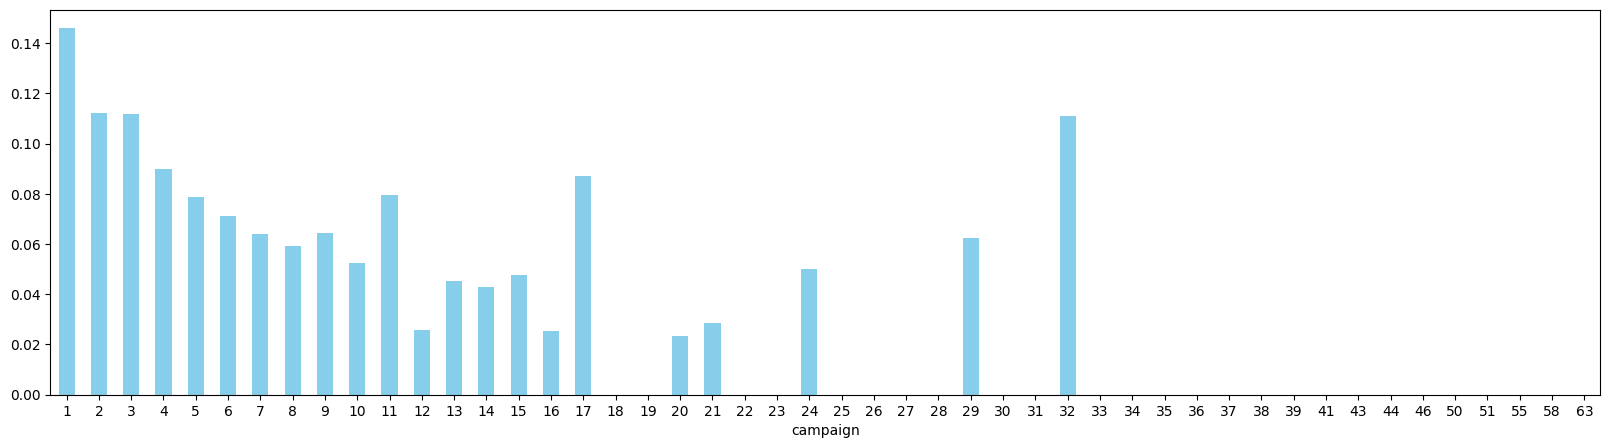

In [15]:
ax = cam_num.plot(kind= 'bar',
                 figsize= (20,5), color = 'skyblue')
plt.xticks(rotation = 0)
plt.show()

In [16]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [17]:
month = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

In [18]:
df['month']= df['month'].apply(lambda x : month.index(x)+1)

In [19]:
df['month']

0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45211, dtype: int64

In [20]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [21]:
jobs_encoded_df = pd.get_dummies(df['job'])
jobs_encoded_df.columns = ['jobs_%s'% x for x in jobs_encoded_df.columns]
jobs_encoded_df

,jobs_admin.,jobs_blue-collar,jobs_entrepreneur,jobs_housemaid,jobs_management,jobs_retired,jobs_self-employed,jobs_services,jobs_student,jobs_technician,jobs_unemployed,jobs_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [22]:
df = pd.concat([df,jobs_encoded_df],axis= 1 )   # 0 = row , 1 = colimns 的連接
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,jobs_entrepreneur,jobs_housemaid,jobs_management,jobs_retired,jobs_self-employed,jobs_services,jobs_student,jobs_technician,jobs_unemployed,jobs_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


In [23]:
marital_encoded_df = pd.get_dummies(df['marital'])

In [24]:
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]
marital_encoded_df

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45206,0,1,0
45207,1,0,0
45208,0,1,0
45209,0,1,0


In [25]:
df = pd.concat([df,marital_encoded_df], axis = 1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,jobs_retired,jobs_self-employed,jobs_services,jobs_student,jobs_technician,jobs_unemployed,jobs_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,0,0,0,0,1,0,0,0,1,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,1,0,0,0,0,0,0,1,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,1,0,0,0,0,0,0,0,1,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,0,0,0,0,0,0,0,0,1,0


4. 開始建立決策樹
sklearn tree , introduction https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [26]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)


In [27]:
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)

response_var = 'conversion'

In [28]:
from sklearn import tree
import graphviz

tree.decisiontreeclassifier, 預設分類法為Gini, criterion{“gini”, “entropy”, “log_loss”}, default=”gini”

In [29]:
dt_model = tree.DecisionTreeClassifier(
    max_depth=4
)

In [30]:
features

['age',
 'balance',
 'campaign',
 'previous',
 'housing',
 'jobs_admin.',
 'jobs_blue-collar',
 'jobs_entrepreneur',
 'jobs_housemaid',
 'jobs_management',
 'jobs_retired',
 'jobs_self-employed',
 'jobs_services',
 'jobs_student',
 'jobs_technician',
 'jobs_unemployed',
 'jobs_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [31]:
dt_model.fit(df[features], df[response_var])  
#Build a decision tree classifier from the training set (X, y).

DecisionTreeClassifier(max_depth=4)

Gini 不純度 越小越好 https://ithelp.ithome.com.tw/articles/10276079 

In [32]:
dot_data = tree.export_graphviz(
    dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=['0', '1'],   # 0,1 標示最後的結果是 conversion多呢  還是non conversion多
    filled=True,     # 貌似是標示出
    rounded= True,   # 好可愛  讓角變圓XDDD
    special_characters=True
) 

In [33]:
graph = graphviz.Source(dot_data)


In [34]:
#ip install IPython

C:\Users\JamesLiu\AppData\Local\Temp\ipykernel_24352\2769644622.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


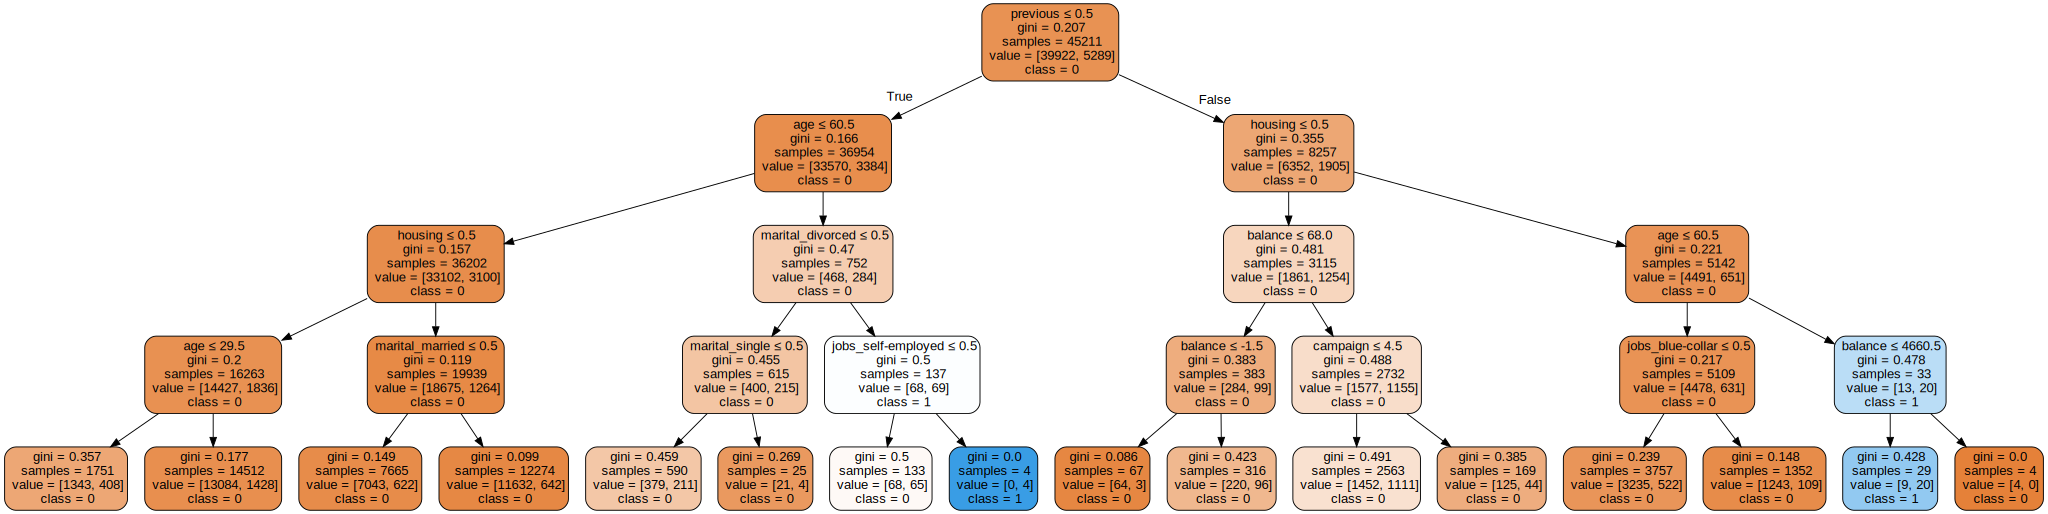

In [35]:
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))

graph

In [36]:
df_org = pd.read_csv('bank.csv',sep= ';')
df_org

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
